In [1]:
import json
import numpy as np
import re
import os
import string
import glob

In [2]:
measure_terms = ["kilogram", "kg", "gram", "milligram", "mg", "ounce", "oz", "pound", "lb", "few", 
                 "several", "many", "plenty", "handful", "pinch", "sprinkle", "teaspoon", "tablespoon", 
                 "cup", "ounce", "pound", "large", "small", "medium", "extra", "double", "triple", "pc", 
                 "ct", "pack" , "piece", "pc", "count", "pk",  "dozen",  "dz" , "set",  "pair", "tray", 
                 "case", "bundle", "box", "bunch" , "head" , "inch", "in", "foot", "ft", "yard", "yd", 
                 "meter", "centimeter", "cm", "millimeter", "mm", "milliliter", "ml", "liter", "fluid ounce",
                 "fl oz", "pint", "pt", "quart", "qt", "qty" ,  "gallon", "gal", "$" , "mkt" , "pm" , "am" , "full",
                 "price", "per" , "lightly" , "hour" , "hours" , "minutes" , "minute"
                ] 


common_terms = ["good" , "very" , "morning" , "voted", "cut", "all" , "day" , "vote", "voted" , "best" , 
                  "town" , "served" ,  "qty" , "cont" , "com" , "www" , "powered", "combinations" , 
                  "combination" , "special" , "until close" , "signmenu" , "reference" , "images" , "image",
                  "thanks" , "thank you" , "recommendations" , "recommendation" , "please" , "ask" , "expensive",
                  "does not" , "believe" , "right" , "delicious" , "food" , "www" , "com" , "mastercard" ,
                  "visa" , "american" , "amex" , "discover", "any style",  "style" , "subject",  "change",
                  "illness" , "may" , "cause",  "person" , "available" , "dining" , "room" , "rooms" , "private",
                  "menus", "market" , "availability" , "seasonality" , "allergens" , "allergic" , "allergies",
                  "restaurant" , "restaurants" , "allery"  , "upgrade" , "way" , "topping" , "top" , "topped" ,
                  "sub" , "plus" , "side" , "sides" , "country" , "link" , "reallygreatsite" , "new", "york" , 
                  "new york strip" , "los" , "angeles"  , "los angeles"
                 ]  


common_headings = ["western dishes" , "western dish" , 
                   "asian dishes" , "asian dish" , 
                   "indian dishes", "indian dish",
                   "desserts" , "dessert" , "lunch" , 
                   "dinner" , "drinks" , "breakfast",
                   "beverages" , "rolls" , "wraps" , "omelets",
                   "small plate" , "small plates" , "plates",
                   "entrees" , "entrées" , "food menu" , "menu" , "food"
                   "popular items" , "seafood dishes" , "lamb dishes" , 
                   "chicken dishes" , "pork dishes", "suitable for vegetarian",
                   "suitable for vegetarians", "fast food" , "appetizers" , "casual italian" ,
                   "starters" , "starter" , "lunch specials" , "specials" , "special",
                   "daily specials" , "daily" , "business" , "business" , "hours" , "sun" , "sunday",
                   "monday" , "mon" , "tuesday" , "tue" , "wednesday" , "wed" , "thu" , "thursday",
                   "friday" , "fri" , "saturday" , "sat" , "carry out" , "carry" , "promotion" , "promotions"
                   "take out" , "delivery" , "dine", "takeout" ,"brunch" , "first course" , "first courses",
                   "main course" , "main courses" , "sides" , "per person"
                  ]


en_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", 
                "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 
                'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 
                'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 
                'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 
                'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 
                'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 
                'a', 'an', 'the', 'but', 'if', 'or', 'because', 'as', 'until', 
                'while', 'of', 'at', 'by', 'for', 'about', 'against', 'between', 
                'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 
                'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 
                'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
                'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
                'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't',
                'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 
                'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', 
                "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 
                'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",
                'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won',
                "won't", 'wouldn', "wouldn't"]



remove_from_dict = [ "lunch" , "dinner" , "combination" , "combinations" , "special" , "served" , 
                     "gluten" , "free" , "most" , "can" , "upon",  "request" , "from" , "all" , "are",
                     "food" , "menu" , "restaurant" , "full" , "popular" , "items" , "item" , "our" , "hint",
                     'choice', 'your', 'flavor' , "two" , "large" , "sides" , "dip" , "best", "breakfast" ,
                     "town" , "day" , "good", "morning" , "good morning" , "served" , "for" , "plus" , "sub",
                     "country", "restaurant" , "restaurants"  ,"food", "menu" , "dishes", "dish",
                     "rolls", "roll" , "wrap" , "wraps", "drink" , "beverage" , "beverages"  ,  "omelets", 
                     'hand', 'cut', 'cooked', 'way' , "favorite" , "fried" , "topped" , "house"
                     "made" , "patty" , "asian" , "western" , "green" , "black" , "pieces" , "wood" , "powered"
                     "base" ,  "pacific" ,  "drive" ,  "venice" , '' , "build" , "order" , "calories" 
                     ] 


remove_terms = measure_terms + common_terms + common_headings  + en_stopwords + remove_from_dict


In [3]:
from fuzzywuzzy import fuzz

def levenshtein_distance(str1, str2):
    return fuzz.ratio(str1, str2)

levenshtein_distance("tomatoes", "tomato")

/home/naeem/anaconda3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


86

In [12]:
class Line:
    
    def __init__(self, line ):
        
        cleaning_regex        = "[a-zA-Zàơûçêèâãúóéñ',]{3,}"
        cleaning_regex_comma  = "[a-zA-Zàơûçêèâãúóéñ'ÀƠÛÇÊÈÂÃÚÓÉÑ,-]+"
        

        self.raw_str    =  " ".join( line ).strip()
        self.raw_str    = self.raw_str.replace( " & " , " and " )
        self.raw_str    = self.raw_str.replace( "' n '" , "and" )
        self.raw_str    = self.raw_str.replace( "' N '" , "AND" )
        self.raw_str    = self.raw_str.replace( "'n'" , "and" )
        self.raw_str    = self.raw_str.replace( "'N'" , "AND" )
        self.raw_str    = self.raw_str.replace( " W " , " WITH " )
        self.raw_str    = self.raw_str.replace( " w " , " with " )
        self.raw_str    = self.raw_str.replace( "(" , "," )
        self.raw_str    = self.raw_str.replace( ")" , "," )
        
        self.raw_str     = " ".join( re.findall( cleaning_regex_comma , self.raw_str  ) )
        self.raw_str     = self.raw_str.replace( " ," , "," )
        
        #This raw_str is very close to the final string that appeared in menu image
        self.raw_str     = re.sub( "\s+" , " " , self.raw_str  ).strip(", ")
        
        
        self.raw_line     = self.raw_str.replace( "," , " " )
        self.raw_line_len = len(self.raw_line)
        
        
        clean_list_comma = re.findall( "[a-zA-Zàơûçêèâãúóéñ']{3,}|[,]" , self.raw_str.lower() )
        self.clean_str_comma = " ".join( [w for w in clean_list_comma if not(w in remove_terms) ] ).strip(", ")
        self.clean_str_comma = self.clean_str_comma.replace( " ," , "," )
    
        self.clean_str_comma = re.sub( "\s+" , " " , self.clean_str_comma  ).strip(", ")
        
        self.clean_line  = self.clean_str_comma.replace( "," , " " ).split()
        self.clean_str   = " ".join(   self.clean_line ).strip()
        self.clean_line_len = len(self.clean_line)
        
        

        
        self.is_garbage = 1
        self.sub_items_ing =  []
        
        
        if (self.clean_line_len == 0) or (self.clean_str in remove_terms):
            #print( "Found In remove_terms so garbage" )
            self.is_garbage = 1
        
        else:
            self.sub_items_ing = self.Final_Sub_Parts( self.clean_line_len , self.clean_line , self.clean_str , self.clean_str_comma )
            self.is_garbage = 0
        
       
    def Final_Sub_Parts( self, clean_line_len , clean_line , clean_str , clean_str_comma ):
        
        all_items_ings_list = []
        
        clean_str_comma = clean_str_comma.replace( "," , " , " ).strip(", ")
        clean_str_comma = re.sub(r'^\s*with\s+|\s+with\s*$', '', clean_str_comma )
        clean_str_comma = re.sub(r'^\s*and\s+|\s+and\s*$', '', clean_str_comma )
        
        
        clean_str_comma = clean_str_comma.replace( " and with " , ", " )
        clean_str_comma = clean_str_comma.replace( " with and " , ", " )
        clean_str_comma = clean_str_comma.replace( " with " , ", " )
        clean_str_comma = clean_str_comma.replace( " and " , ", " )
        
        clean_line = [ w.strip(", ") for w in clean_line if not( w.strip(", ") in ["and" , "with"] ) ]
        
        
        if  (len(clean_line) <= 4) and not("," in clean_str_comma):
            all_items_ings_list.append( " ".join( clean_line )    )
        
                    
        elif ("," in clean_str_comma):
            new_clean_list = clean_str_comma.split(",")
            for ncl in new_clean_list:
                
                ncl = ncl.strip()
                
                if  len(ncl.split()) == 0:
                    continue
                
                elif  len(ncl.split()) <= 4:
                    all_items_ings_list.append( ncl )
                else:
                    nlc = ncl.split()
                    for i in range( 0 , len(nlc) , 2 ):
                        if len( nlc[i : (i+3) ] ) >= 2:
                            all_items_ings_list.append( " ".join( nlc[ i:(i+3) ] )  )
        else:
            
            for i in range( 0 , len(clean_line) , 2 ):
                if len( clean_line[i : (i+3) ] ) >= 2:
                    all_items_ings_list.append( " ".join( clean_line[ i : (i+3) ] )  )
        
        return all_items_ings_list
        
    
class Block:
    
    def __init__(self, old_index , block ):
        
        self.old_index = old_index
        self.raw_block = block
        
        self.lines = []
        
        for paragraph in block["paragraphs"]:
            
            lines_list = self.Find_Lines_In_Paragraph(paragraph)

            for ith_line in lines_list:
                
                Line_obj = Line(ith_line)
                
                if not Line_obj.is_garbage :
                    self.lines.append(  Line_obj )
    
    def print(self  ):
        
        for li , line in enumerate(self.lines):
                print("\tLine#" + str(li) )
                print( "\t\traw_str: \t" ,  line.raw_str )
                print( "\t\tclean_str_comma: \t" ,  line.clean_str_comma )
                print( "\t\tsub_items_ing: \t" , line.sub_items_ing )
                print("\tLine_End#" )
    
    
    #Please do not modify the following function
    def Find_Lines_In_Paragraph(self, paragraph):
        
        words_list = [[]]
        for  wi , word in enumerate( paragraph["words"] ):

            word_str =  ""        
            for symbol in word["symbols"]:
                word_str += symbol["text"]


            if (wi>=1) :
                
                pp_y = [ p["y"] for p in paragraph["words"][wi-1]["boundingBox"]["vertices"]  ]
                pp_min_y = min(  pp_y )
                pp_max_y = max(  pp_y )

                cp_y = [ p["y"] for p in paragraph["words"][wi]["boundingBox"]["vertices"]  ]
                cp_min_y = min(  cp_y )
                cp_max_y = max(  cp_y )

                pp_x = [ p["x"] for p in paragraph["words"][wi-1]["boundingBox"]["vertices"]  ]
                pp_min_x = min(  pp_x )
                pp_max_x = max(  pp_x )

                cp_x = [ p["x"] for p in paragraph["words"][wi]["boundingBox"]["vertices"]  ]
                cp_min_x = min(  cp_x )
                cp_max_x = max(  cp_x )
                
                if  len(words_list[-1])>0 and \
                    (cp_max_y >= pp_max_y) and  (cp_min_x <= pp_max_x) and \
                    (   (word_str.lower() != word_str) or \
                        ( words_list[-1][-1].isupper() and word_str.islower() ) or \
                        ( words_list[-1][-1].islower() and word_str.isupper() ) or \
                        ( words_list[-1][-1].strip()[0].isupper() and word_str.strip()[0].islower() ) or \
                        ( words_list[-1][-1].strip()[0].islower() and word_str.strip()[0].isupper() ) or \
                        ( words_list[-1][-1].strip()[-1] in "'()*:[]" )  or \
                        ( words_list[-1][-1].strip()[-1] in "'()*:[]" ) or \
                        ( word_str.strip()[0] in "'(*:["   ) or \
                        ( word_str.isnumeric()   )
                     
                         
                    ):
                
                    #new line dectected
                    words_list.append(  [word_str] )

                else:
                    words_list[-1].append( word_str )

            else:
                words_list[-1].append( word_str )

        
        return words_list
            
        
class Document:
    
    def __init__( self, page ):
        
        self.blocks = []
        self.total_lines = 0
        
        for b_num , block in enumerate( page["blocks"] ):
            
            Block_obj = Block( b_num , block )
            
            if len(Block_obj.lines) > 0 :
                self.blocks.append( Block_obj )
            
    
    def print( self , b_index=-1 ):
        
        if b_index== -1:
            for b_num , block in enumerate( self.blocks ):
                
                self.total_lines += len(block.lines)
                
                print( "Block#" + str(b_num) , "\t Total Lines in block:" , len(block.lines)  )
                block.print()
                print( "Block_End#\n")
        else:
            if b_index < len(self.blocks):
                self.blocks[b_index].print()
            else:
                print( "Block index is out of range." )
    

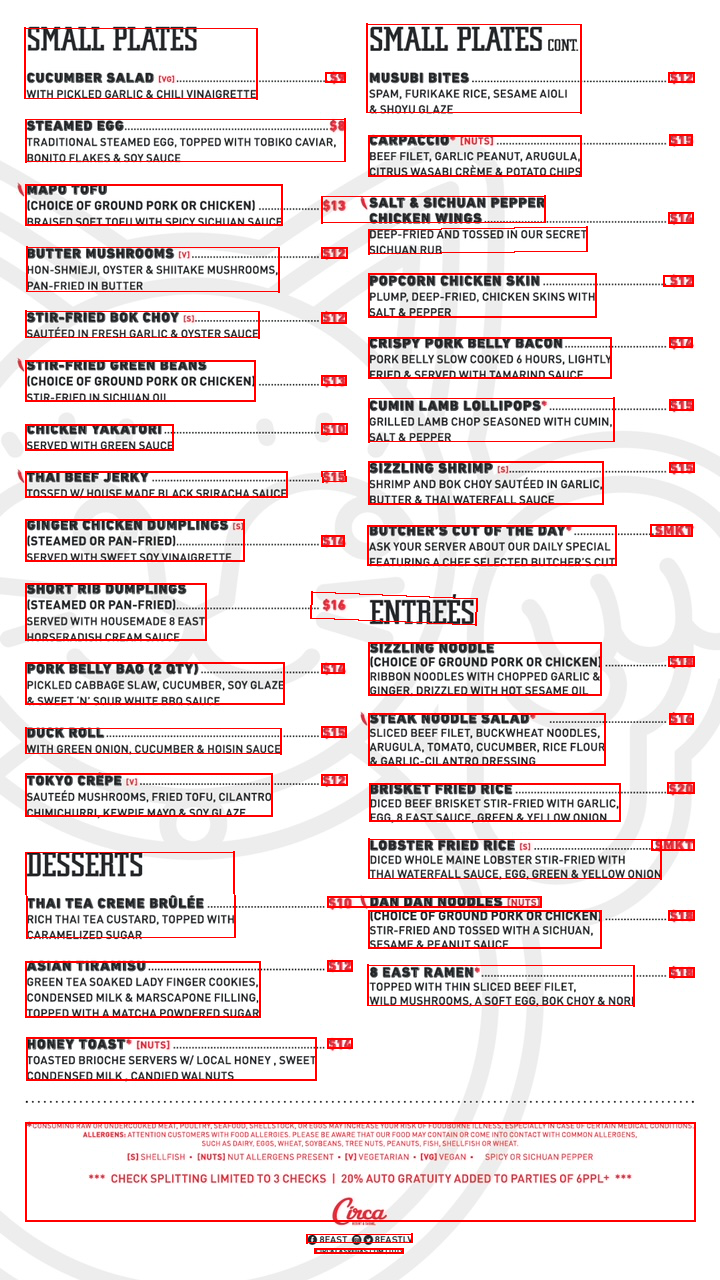

In [1]:
from google.cloud import vision
# from google.cloud.vision import types
import io
from PIL import Image, ImageDraw
from enum import Enum
import json

class FeatureType(Enum):
    PAGE = 1
    BLOCK = 2
    PARA = 3
    WORD = 4
    SYMBOL = 5


def draw_boxes(image, bounds, color,width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        draw.line([
            bound["vertices"][0]["x"], bound["vertices"][0]["y"],
            bound["vertices"][1]["x"], bound["vertices"][1]["y"],
            bound["vertices"][2]["x"], bound["vertices"][2]["y"],
            bound["vertices"][3]["x"], bound["vertices"][3]["y"],
            bound["vertices"][0]["x"], bound["vertices"][0]["y"] ],fill=color, width=width)
    return image

def get_document_bounds(response, feature):
    bounds = []
    try : 
        for i,page in enumerate(response["fullTextAnnotation"]["pages"]):
            for block in page['blocks']:
                if feature==FeatureType.BLOCK:
                    bounds.append(block["boundingBox"])
                for paragraph in block["paragraphs"]:
                    if feature==FeatureType.PARA:
                        bounds.append(paragraph["boundingBox"])
                    for word in paragraph["words"]:
                        for symbol in word["symbols"]:
                            if (feature == FeatureType.SYMBOL ):
                                bounds.append(symbol["boundingBox"])
                        if (feature == FeatureType.WORD):
                            bounds.append(word["boundingBox"])
    except:
        print( block.keys() )
    return bounds


image_file='./Menus/8eastlv-menu.jpg'
image  = Image.open(image_file)
json_path = "./Menus/8eastlv-menu.raw.json"  # Ingredients are below

with open(  json_path ) as f:
    response = json.loads( json.load( f   ) )

bounds = get_document_bounds(response, FeatureType.BLOCK)
draw_boxes(image, bounds, 'red')

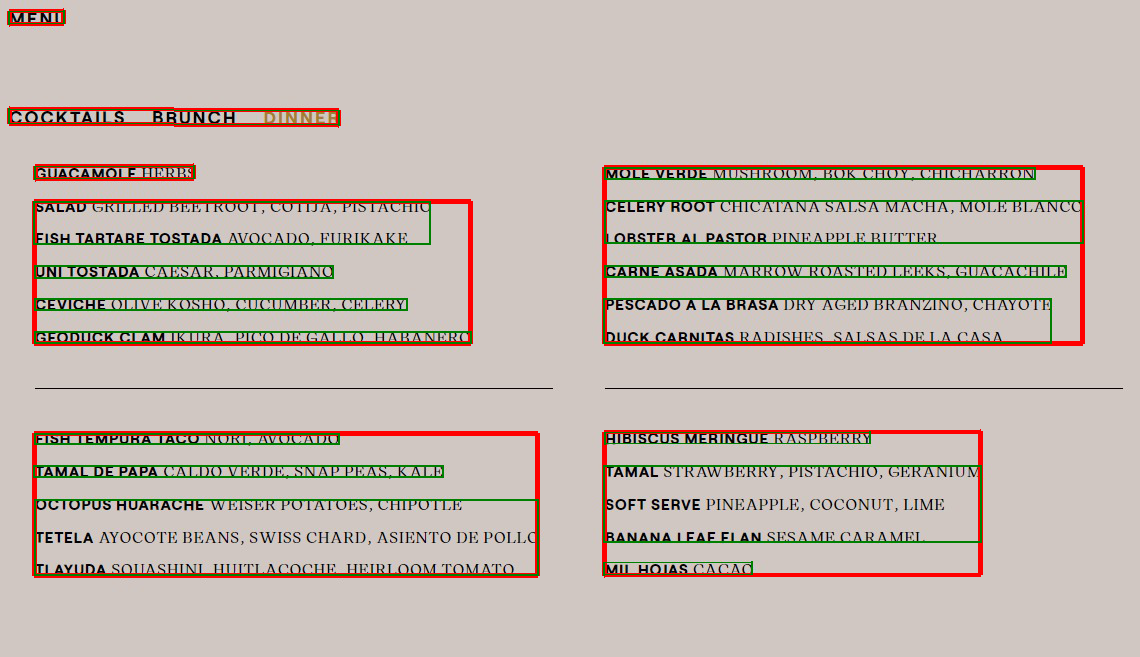

In [16]:
# json_path = "./Menus/menu_items_ing_front/Dinner_2.raw.json"  # Ingredients are in front


image_file='./Menus/menu_items_ing_front/Dinner_2.jpg'
image  = Image.open(image_file)
json_path = "./Menus/menu_items_ing_front/Dinner_2.raw.json"  # Ingredients are below

with open(  json_path ) as f:
    response = json.loads( json.load( f   ) )

bounds = get_document_bounds(response, FeatureType.BLOCK)
image = draw_boxes(image, bounds, 'red' ,   width= 5 )
bounds = get_document_bounds(response, FeatureType.PARA)
draw_boxes(image, bounds, 'green' , width= 2 )

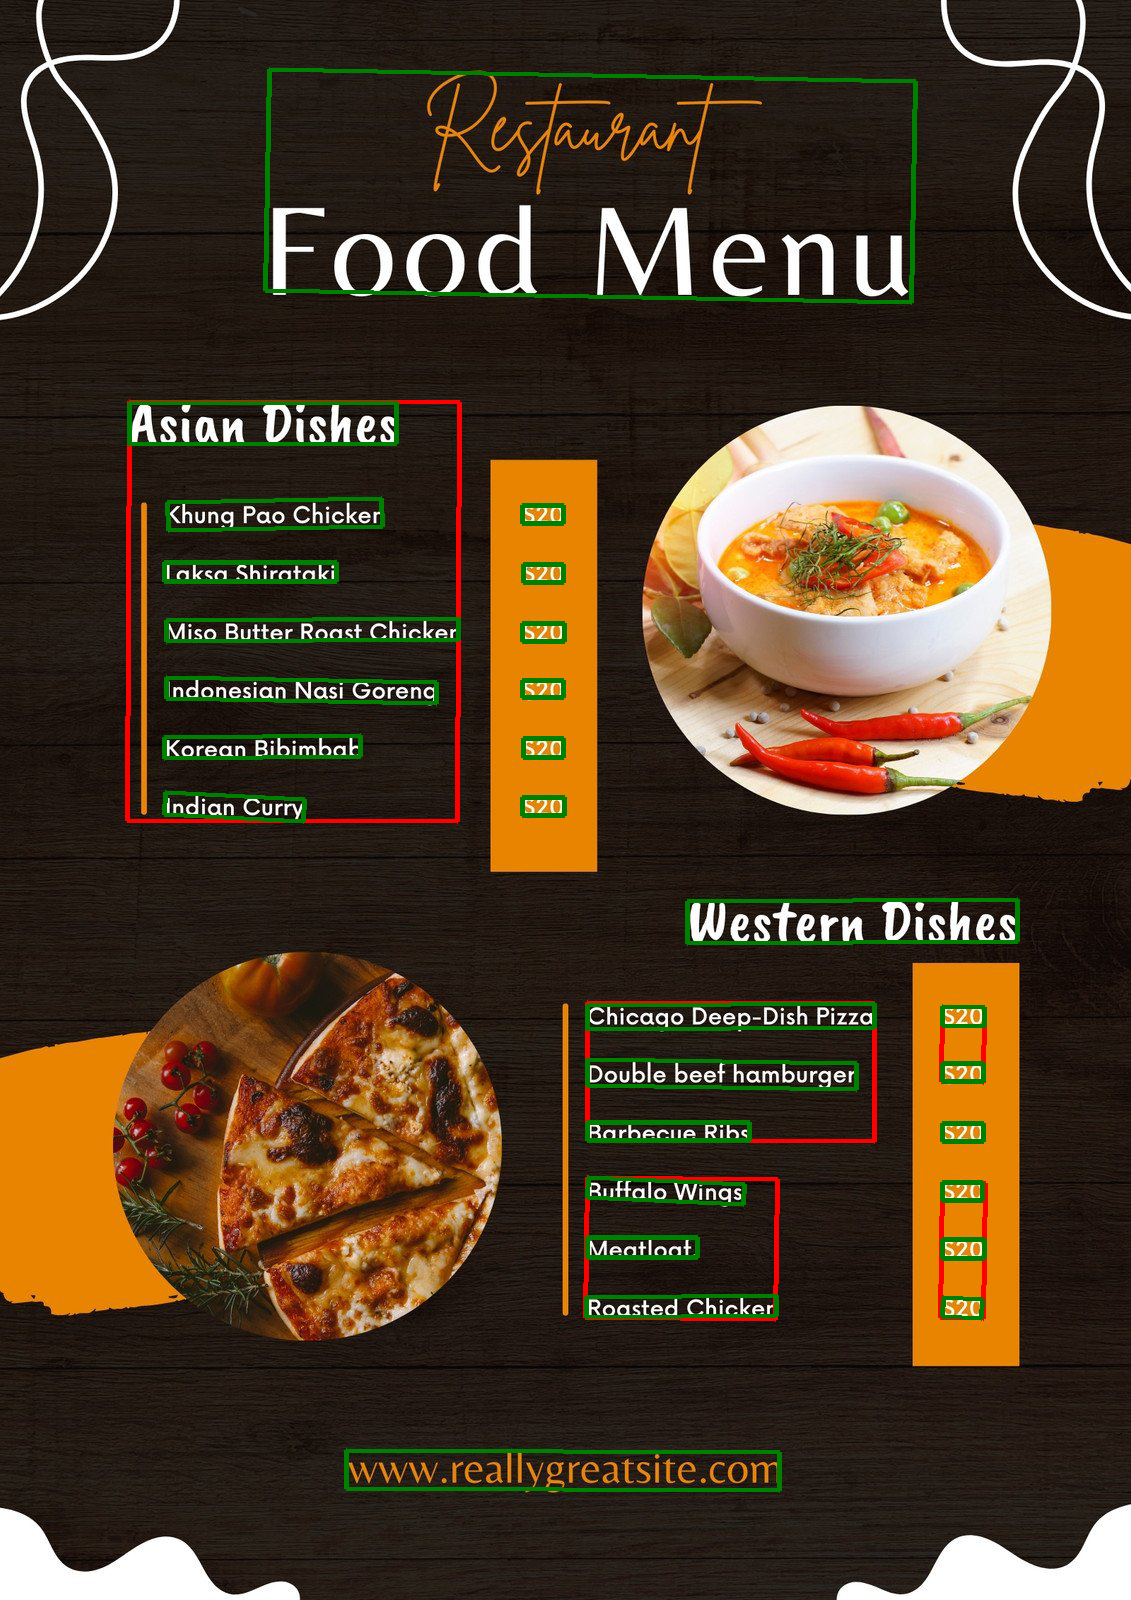

In [17]:
# json_path = "./Menus/menu_items_ing_front/Dinner_2.raw.json"  # Ingredients are in front


image_file='./mixed_menus/000003.jpg'
image  = Image.open(image_file)
json_path = "./mixed_menus/000003.raw.json"  # Ingredients are below

with open(  json_path ) as f:
    response = json.loads( json.load( f   ) )

bounds = get_document_bounds(response, FeatureType.BLOCK)
image = draw_boxes(image, bounds, 'red' , width= 5)
bounds = get_document_bounds(response, FeatureType.PARA)
draw_boxes(image, bounds, 'green' , width= 5 )

In [27]:
# json_path = "./mixed_menus/000003.raw.json"  # No ingredients
# json_path = "./Menus/8eastlv-menu.raw.json"  # Ingredients are below
# json_path = "./Menus/menu_items_ing_front/Dinner_2.raw.json"  # Ingredients are in front


with open(  json_path ) as f:
    loaded_data = json.loads( json.load( f   ) )
page  = loaded_data["fullTextAnnotation"]["pages"][0]
doc = Document( page )
doc.print()

Block#0 	 Total Lines in block: 1
	Line#0
		raw_str: 	 COCKTAILS BRUNCH DINNER
		clean_str_comma: 	 cocktails
		sub_items_ing: 	 ['cocktails']
	Line_End#
Block_End#

Block#1 	 Total Lines in block: 1
	Line#0
		raw_str: 	 GUACAMOLE HERBS
		clean_str_comma: 	 guacamole herbs
		sub_items_ing: 	 ['guacamole herbs']
	Line_End#
Block_End#

Block#2 	 Total Lines in block: 5
	Line#0
		raw_str: 	 SALAD GRILLED BEETROOT, COTIJA, PISTACHIO
		clean_str_comma: 	 salad grilled beetroot, cotija, pistachio
		sub_items_ing: 	 ['salad grilled beetroot', 'cotija', 'pistachio']
	Line_End#
	Line#1
		raw_str: 	 FISH TARTARE TOSTADA AVOCADO, FURIKAKE
		clean_str_comma: 	 fish tartare tostada avocado, furikake
		sub_items_ing: 	 ['fish tartare tostada avocado', 'furikake']
	Line_End#
	Line#2
		raw_str: 	 UNI TOSTADA CAESAR, PARMIGIANO
		clean_str_comma: 	 uni tostada caesar, parmigiano
		sub_items_ing: 	 ['uni tostada caesar', 'parmigiano']
	Line_End#
	Line#3
		raw_str: 	 CEVICHE OLIVE KOSHO, CUCUMBER, CELERY

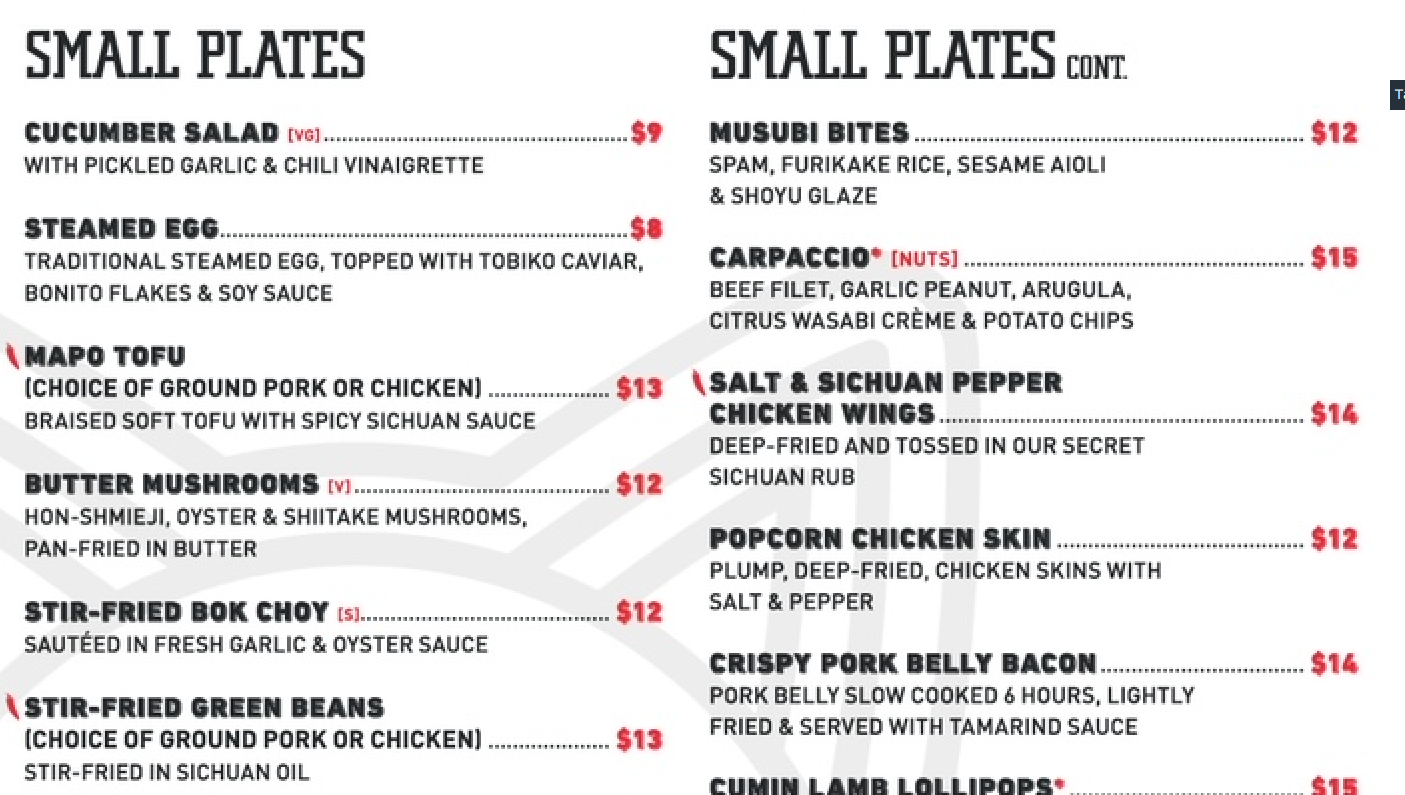

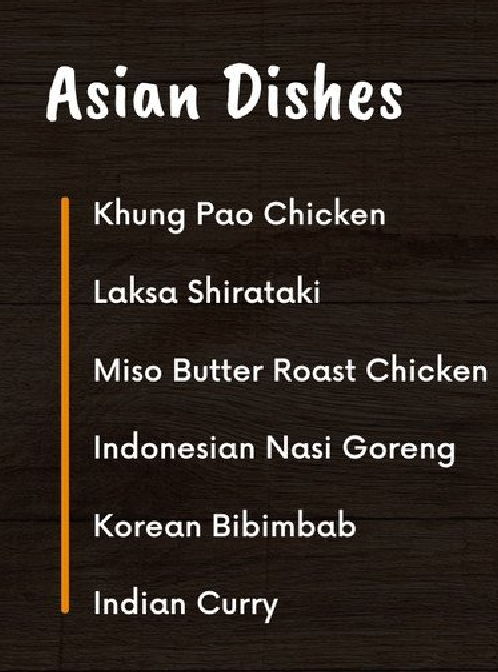

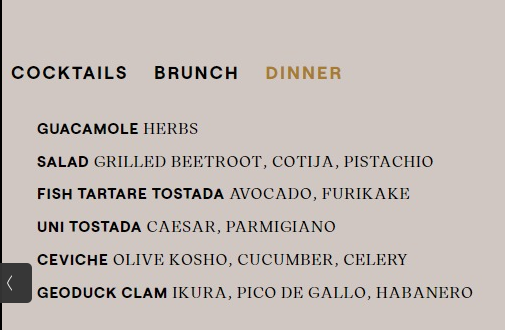